# Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
CarPrice=pd.read_csv("CarPrice_Assignment.csv")
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
CarPrice.shape
#CarPrice.describe()
CarPrice.info()
list(CarPrice)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

# Data Preparation

In [4]:
#Seprating Car Maker and its model and cleaning the name of makers 

new=CarPrice['CarName'].str.split(' ',1)
CarPrice['CarBrand']=new.str.get(0).str.lower()

count=CarPrice['CarBrand'].value_counts()
count.sort_index(ascending=False)

CarPrice.loc[(CarPrice.CarBrand=='vw') | (CarPrice.CarBrand=='vokswagen') ,'CarBrand'] ='volkswagen'
CarPrice.loc[(CarPrice.CarBrand=='toyouta') ,'CarBrand'] ='toyota'
CarPrice.loc[(CarPrice.CarBrand=='porcshce') ,'CarBrand'] ='porsche'
CarPrice.loc[(CarPrice.CarBrand=='maxda') ,'CarBrand'] ='mazda'
    
count=CarPrice['CarBrand'].value_counts()
count.sort_index(ascending=False)
#CarPrice

volvo          11
volkswagen     12
toyota         32
subaru         12
saab            6
renault         2
porsche         5
plymouth        7
peugeot        11
nissan         18
mitsubishi     13
mercury         1
mazda          17
jaguar          3
isuzu           4
honda          13
dodge           9
chevrolet       3
buick           8
bmw             8
audi            7
alfa-romero     3
Name: CarBrand, dtype: int64

In [5]:
#Converting labels of doornumber & cylindernumber to int.

CarPrice.loc[(CarPrice.doornumber=='two') ,'doornumber'] = 2
CarPrice.loc[(CarPrice.doornumber=='four') ,'doornumber'] = 4

CarPrice.loc[(CarPrice.cylindernumber=='two') ,'cylindernumber'] = 2
CarPrice.loc[(CarPrice.cylindernumber=='three') ,'cylindernumber'] = 3
CarPrice.loc[(CarPrice.cylindernumber=='four') ,'cylindernumber'] = 4
CarPrice.loc[(CarPrice.cylindernumber=='five') ,'cylindernumber'] = 5
CarPrice.loc[(CarPrice.cylindernumber=='six') ,'cylindernumber'] = 6
CarPrice.loc[(CarPrice.cylindernumber=='eight') ,'cylindernumber'] = 8
CarPrice.loc[(CarPrice.cylindernumber=='twelve') ,'cylindernumber'] = 12

# Converting enginetype dohcv to dohc as dohcv Engine type is not available
CarPrice.loc[(CarPrice.enginetype=='dohcv') ,'enginetype'] = 'dohc'

In [6]:
CarPrice.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero


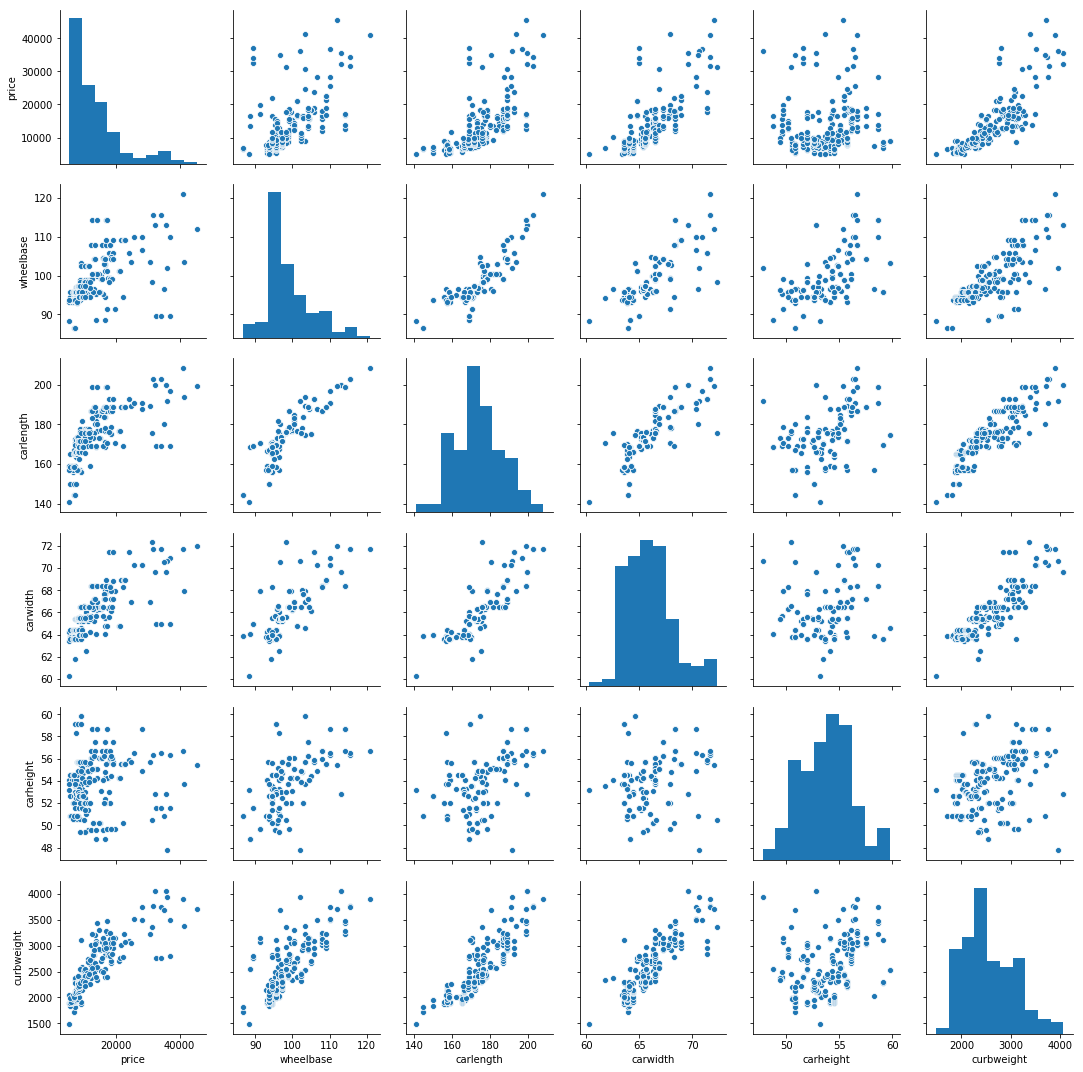

In [7]:
#Calculating scatter plot of all numeric variables
sns.pairplot(data=CarPrice,vars=[ 'price','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight'])
plt.show()

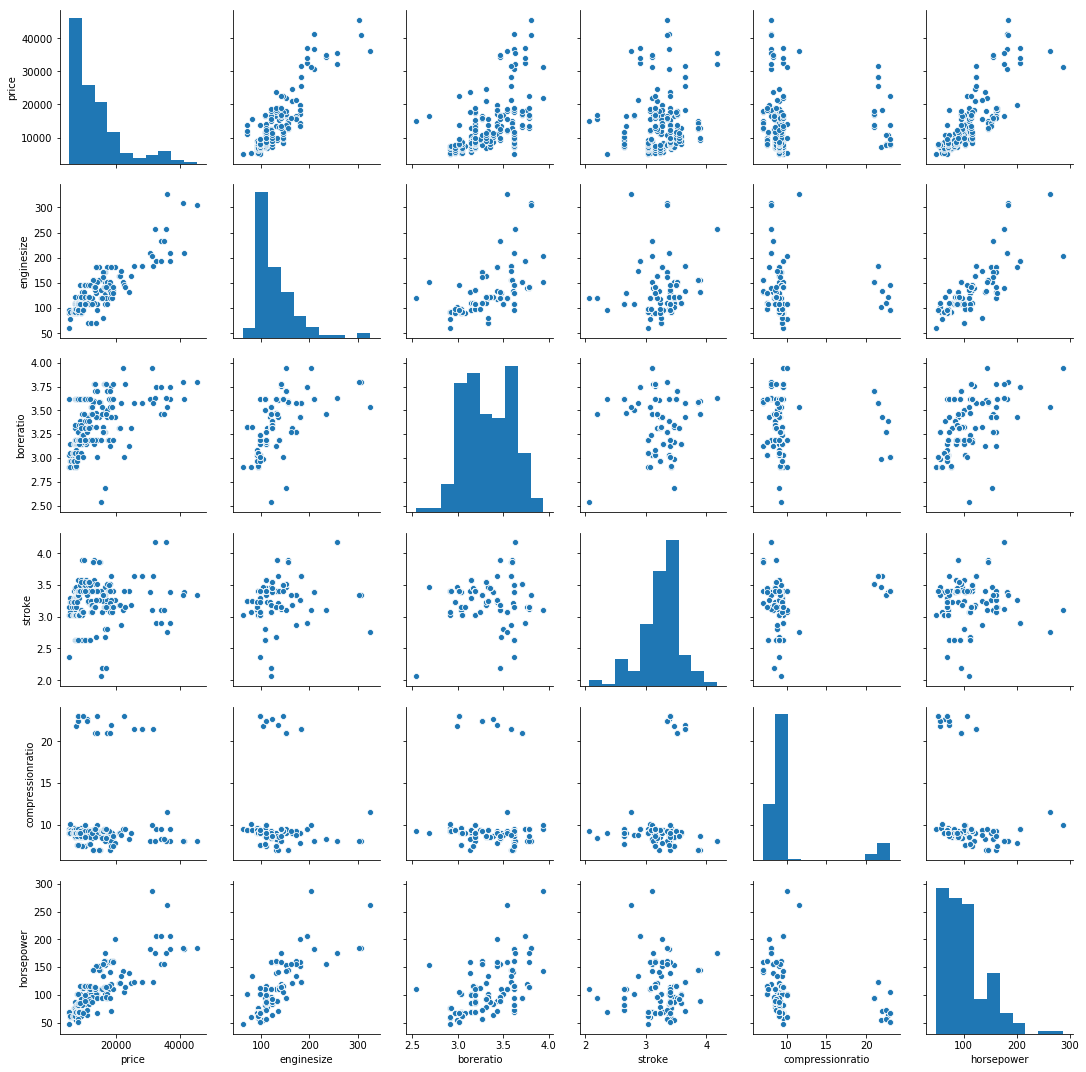

In [8]:
sns.pairplot(data=CarPrice,vars=[ 'price','enginesize','boreratio', 'stroke', 'compressionratio', 'horsepower'])
plt.show()

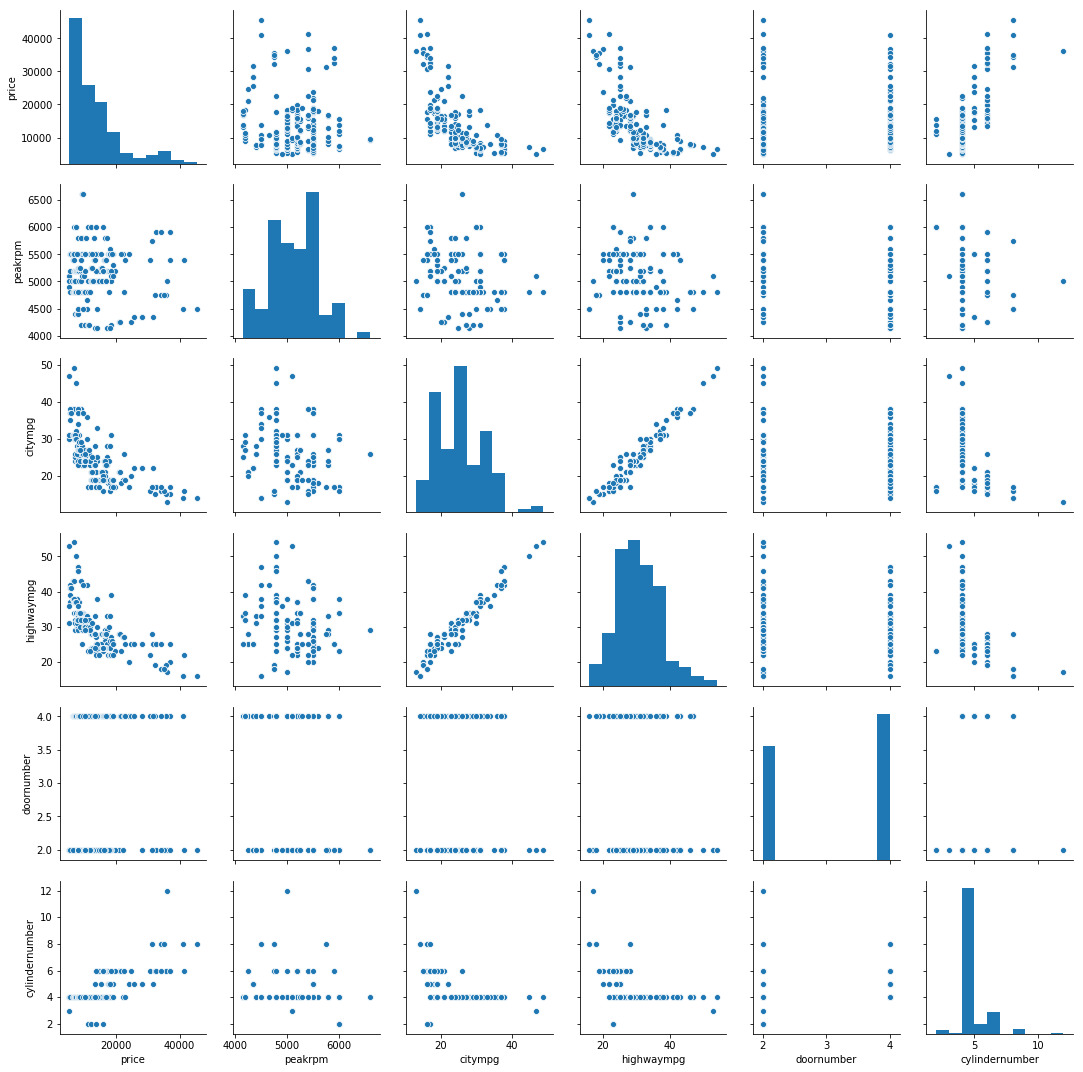

In [9]:
sns.pairplot(data=CarPrice,vars=[ 'price','peakrpm', 'citympg', 'highwaympg','doornumber','cylindernumber'])
plt.show()

# Creating Dummy Variables

In [10]:
#Creating Dummy Variables for Categorical variables
fueltype = pd.get_dummies(CarPrice['fueltype'],drop_first=True)
aspiration = pd.get_dummies(CarPrice['aspiration'],drop_first=True)
carbody = pd.get_dummies(CarPrice['carbody'],drop_first=True)
drivewheel = pd.get_dummies(CarPrice['drivewheel'],drop_first=True)
enginelocation = pd.get_dummies(CarPrice['enginelocation'],drop_first=True)
enginetype = pd.get_dummies(CarPrice['enginetype'],drop_first=True)
fuelsystem = pd.get_dummies(CarPrice['fuelsystem'],drop_first=True)
CarBrand = pd.get_dummies(CarPrice['CarBrand'],drop_first=True)

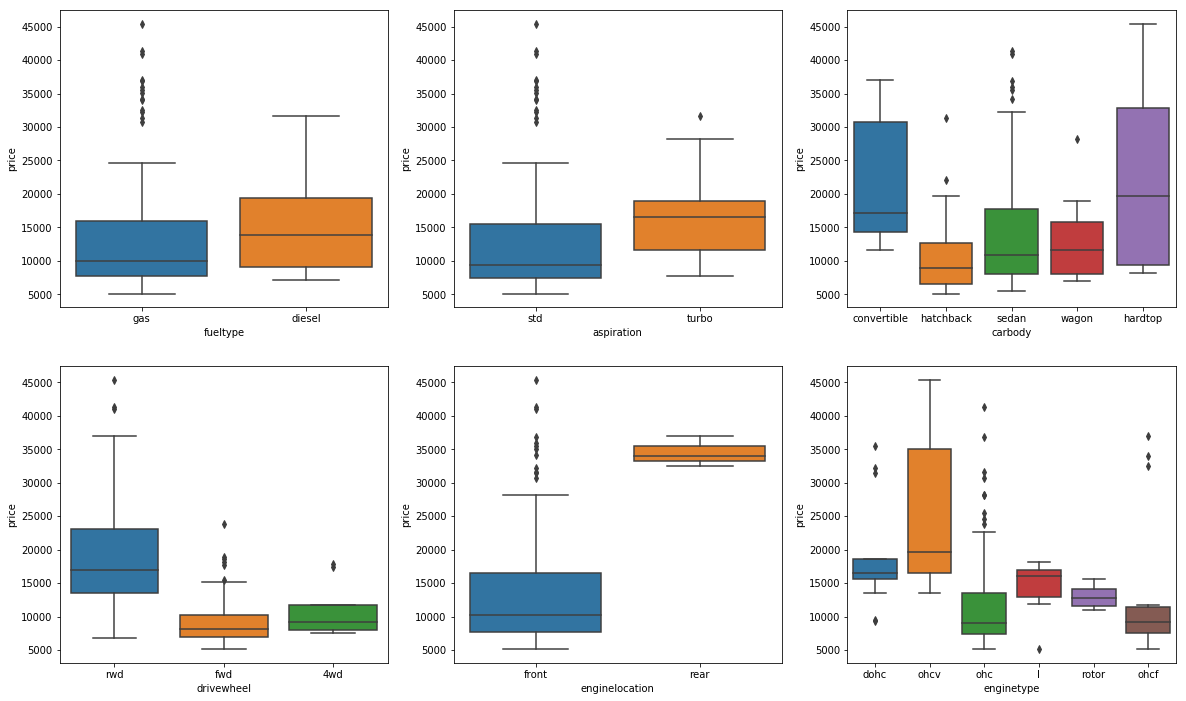

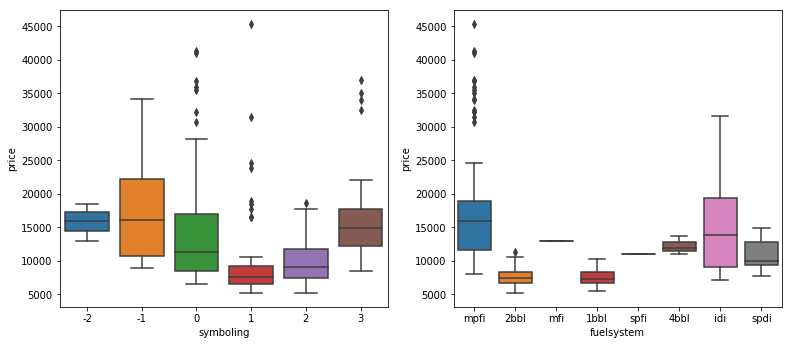

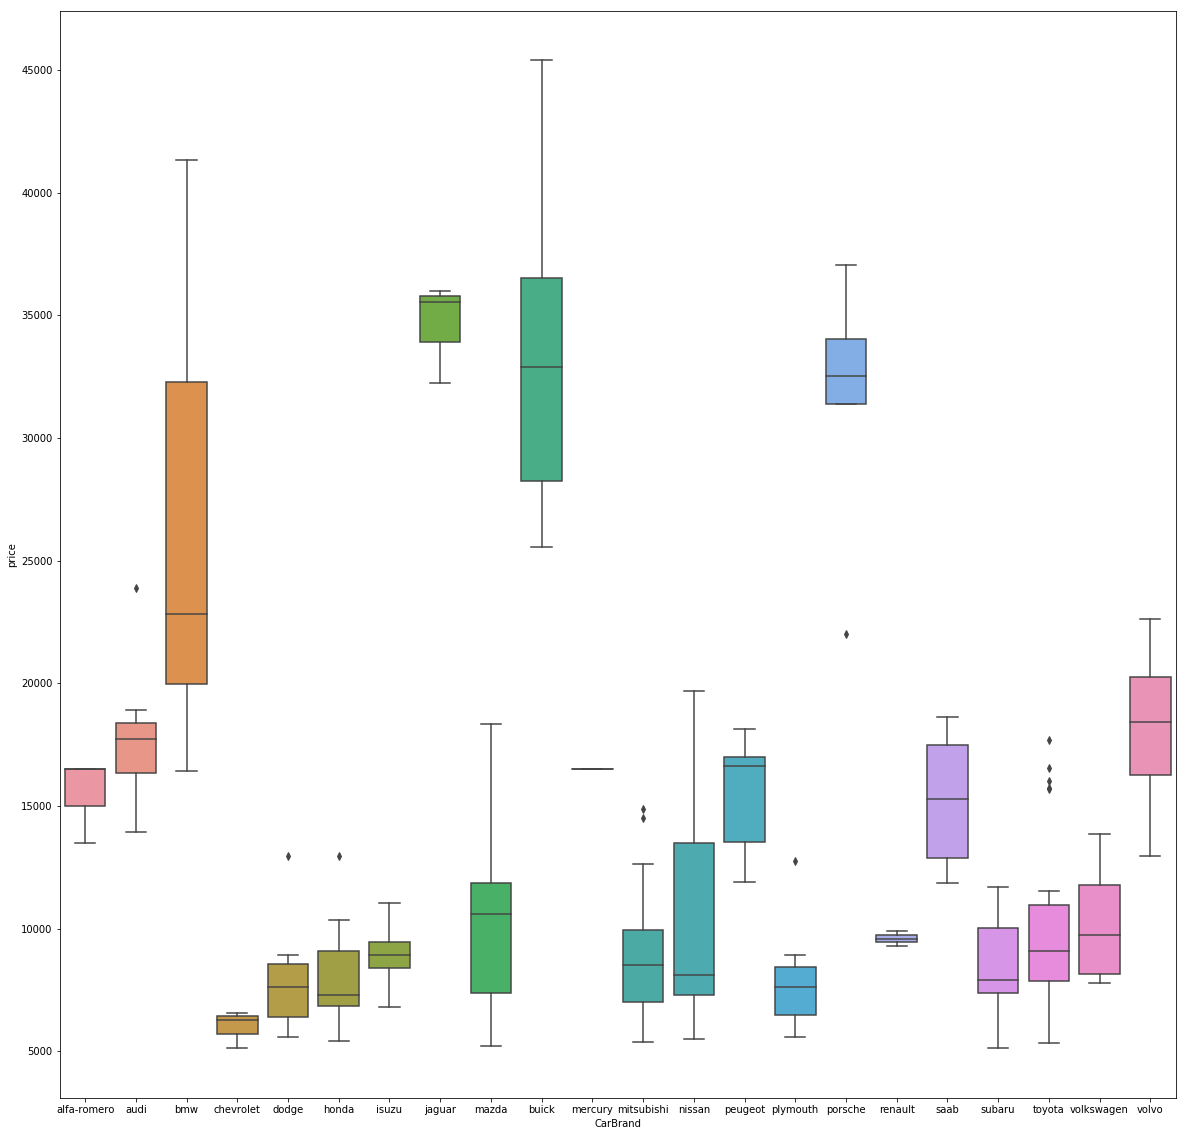

In [11]:
#Visualize Categorical Variable using box plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(2,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.show()

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice)
plt.subplot(2,3,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)


plt.figure(figsize=(20, 20))
sns.boxplot(x = 'CarBrand', y = 'price', data = CarPrice)
plt.show()

In [12]:
#Dropping Extra Columns

CarPrice = CarPrice.drop(columns=[ 'CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 
                       'enginelocation', 'enginetype', 'fuelsystem', 'CarBrand'])


CarPrice = pd.concat([CarPrice, fueltype, aspiration, carbody, drivewheel, enginelocation, 
                      enginetype, fuelsystem, CarBrand], axis = 1)
list(CarPrice)
#CarPrice.shape

['car_ID',
 'symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'gas',
 'turbo',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'fwd',
 'rwd',
 'rear',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [13]:
CarPrice.head(5)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
CarPrice_train, CarPrice_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using MinMax scaling.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = [ 'symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

CarPrice_train[num_vars] = scaler.fit_transform(CarPrice_train[num_vars])
CarPrice_train.head()
CarPrice_train.describe()

C:\Users\Abhijeet Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abhijeet Kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.524476,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,58.977655,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,147.500000,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#Calculating correlation to see variables which have relation with price(dependent variable)
#plt.figure(figsize = (100, 100))
# CarPrice=CarPrice[['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
# 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
# 'wagon', 'fwd', 'rwd', 'rear', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick',
# 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
# 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']]

#sns.heatmap(CarPrice.corr(), annot = True, cmap="YlGnBu") 
#plt.show()

#Since the Correlation Plot in not redable I exported csv using below and commented above code 

Correlation=CarPrice_train.corr()
#Correlation.to_csv('Correlation.csv')
#CarPrice.to_csv('CarPrice.csv')

### Dividing into X and Y sets for the model building

In [17]:
# Dividing into X and Y sets for the model building

y_train = CarPrice_train.pop('price')
X_train = CarPrice_train

# Building model - RFE

In [18]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [19]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [20]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 41),
 ('symboling', False, 42),
 ('doornumber', False, 39),
 ('wheelbase', False, 19),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 33),
 ('peakrpm', True, 1),
 ('citympg', False, 3),
 ('highwaympg', False, 28),
 ('gas', True, 1),
 ('turbo', False, 29),
 ('hardtop', False, 24),
 ('hatchback', False, 22),
 ('sedan', False, 23),
 ('wagon', False, 25),
 ('fwd', False, 35),
 ('rwd', False, 40),
 ('rear', True, 1),
 ('l', True, 1),
 ('ohc', False, 26),
 ('ohcf', False, 6),
 ('ohcv', False, 37),
 ('rotor', False, 2),
 ('2bbl', False, 38),
 ('4bbl', False, 27),
 ('idi', True, 1),
 ('mfi', False, 45),
 ('mpfi', False, 31),
 ('spdi', False, 32),
 ('spfi', False, 44),
 ('audi', False, 17),
 ('bmw', True, 1),
 ('buick', False, 36),
 ('chevrolet', False, 14),
 ('dodg

In [21]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'gas', 'rear', 'l', 'idi',
       'bmw', 'peugeot', 'porsche'],
      dtype='object')

In [22]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'horsepower', 'citympg', 'highwaympg', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'plymouth', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [23]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [24]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [25]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#summary of First linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.15e-68
Time:                        23:44:52   Log-Likelihood:                 212.15
No. Observations:                 143   AIC:                            -394.3
Df Residuals:                     128   BIC:                            -349.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1338      0.070  

In [26]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [27]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,gas,165.52
11,idi,98.54
6,compressionratio,47.27
3,enginesize,37.10
2,cylindernumber,17.81
1,curbweight,11.40
13,peugeot,9.98
10,l,9.13
4,boreratio,6.95
0,carwidth,5.51


In [28]:
#Dropping "gas" as it has high VIF and P(t)
X_train_new = X_train_rfe.drop(["gas"], axis = 1)

In [29]:
# Rebuilding the model without gas
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [30]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#summary of Second linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.15e-68
Time:                        23:44:52   Log-Likelihood:                 212.15
No. Observations:                 143   AIC:                            -394.3
Df Residuals:                     128   BIC:                            -349.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1016      0.065  

In [31]:
X_train_new.columns

Index(['const', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'rear', 'l',
       'idi', 'bmw', 'peugeot', 'porsche'],
      dtype='object')

In [32]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [33]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,compressionratio,67.30
10,idi,51.03
3,enginesize,49.99
1,curbweight,48.96
0,carwidth,39.32
2,cylindernumber,34.30
4,boreratio,13.90
5,stroke,11.54
12,peugeot,10.45
9,l,9.50


In [34]:
#compressionratio is insignificant in presence of other variables; can be dropped
X_train_new = X_train_new.drop(["compressionratio"], axis = 1)

In [35]:
# Rebuilding the model without compressionratio
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [36]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of Third linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.60e-69
Time:                        23:44:53   Log-Likelihood:                 211.56
No. Observations:                 143   AIC:                            -395.1
Df Residuals:                     129   BIC:                            -353.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0766      0.061      1.

In [37]:
X_train_new.columns

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'rear', 'l', 'idi', 'bmw', 'peugeot', 'porsche'],
      dtype='object')

In [38]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,48.24
3,enginesize,43.21
0,carwidth,39.31
2,cylindernumber,21.75
5,stroke,11.10
4,boreratio,10.45
11,peugeot,10.19
8,l,9.42
6,peakrpm,8.45
9,idi,1.93


In [39]:
#Dropping "curbweight" as it has high VIF
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [40]:
# Rebuilding the model without curbweight
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [41]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of fourth linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.37e-67
Time:                        23:44:54   Log-Likelihood:                 202.55
No. Observations:                 143   AIC:                            -379.1
Df Residuals:                     130   BIC:                            -340.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1403      0.062      2.

In [42]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.66
2,enginesize,25.32
1,cylindernumber,19.97
4,stroke,10.91
3,boreratio,10.26
10,peugeot,10.12
7,l,9.41
5,peakrpm,8.25
8,idi,1.89
11,porsche,1.71


In [43]:
#Since dropping carwidth reduced r square tremendously and rear gets a very high p(t), removing rear improves
X_train_new = X_train_new.drop(["rear"], axis = 1)

In [44]:
# Rebuilding the model without rear
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [45]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of Fifth linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     139.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.36e-66
Time:                        23:44:54   Log-Likelihood:                 198.53
No. Observations:                 143   AIC:                            -373.1
Df Residuals:                     131   BIC:                            -337.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1861      0.062      3.

In [46]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,24.29
2,enginesize,24.07
1,cylindernumber,19.92
4,stroke,10.91
3,boreratio,10.24
9,peugeot,10.08
6,l,9.40
5,peakrpm,7.93
7,idi,1.86
10,porsche,1.23


In [47]:
#Since dropping carwidth reduced r square tremendously and l gets a very high probability which also has high VIF,
X_train_new = X_train_new.drop(["l"], axis = 1)

In [48]:
# Rebuilding the model without l
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [49]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of Sixth linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     148.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.76e-67
Time:                        23:44:55   Log-Likelihood:                 196.12
No. Observations:                 143   AIC:                            -370.2
Df Residuals:                     132   BIC:                            -337.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2079      0.062      3.

In [50]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,24.02
0,carwidth,23.74
1,cylindernumber,19.75
4,stroke,10.81
3,boreratio,10.17
5,peakrpm,7.92
6,idi,1.86
8,peugeot,1.40
9,porsche,1.23
7,bmw,1.15


In [51]:
#Since dropping carwidth reduced r square tremendously and peugeot gets a very high probability which also has high VIF,
X_train_new = X_train_new.drop(["peugeot"], axis = 1)

In [52]:
# Rebuilding the model without peugeot
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [53]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of Seventh linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.47e-65
Time:                        23:44:56   Log-Likelihood:                 190.39
No. Observations:                 143   AIC:                            -360.8
Df Residuals:                     133   BIC:                            -331.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1848      0.063      2.

In [54]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,24.00
0,carwidth,22.41
1,cylindernumber,19.40
4,stroke,10.63
3,boreratio,10.05
5,peakrpm,7.90
6,idi,1.78
8,porsche,1.22
7,bmw,1.15


In [55]:
#cylindernumber is insignificant in presence of other variables; can be dropped
X_train_new = X_train_new.drop(["cylindernumber"], axis = 1)

In [56]:
# Rebuilding the model without cylindernumber
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [57]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of Eighth linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     126.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.65e-58
Time:                        23:44:56   Log-Likelihood:                 170.19
No. Observations:                 143   AIC:                            -322.4
Df Residuals:                     134   BIC:                            -295.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1748      0.037     -4.717      0.0

In [58]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,22.14
3,stroke,10.63
1,enginesize,10.04
2,boreratio,9.32
4,peakrpm,6.62
5,idi,1.78
7,porsche,1.22
6,bmw,1.14


In [59]:
#carwidth is insignificant in presence of other variables; can be dropped
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

In [60]:
# Rebuilding the model without carwidth
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [61]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of Ninth linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.66e-51
Time:                        23:44:57   Log-Likelihood:                 148.83
No. Observations:                 143   AIC:                            -281.7
Df Residuals:                     135   BIC:                            -258.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1620      0.043     -3.783      0.0

## Residual Analysis of the train data

In [62]:
y_train_price = lm.predict(X_train_lm)

In [63]:
#Residual Analysis of the train data

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

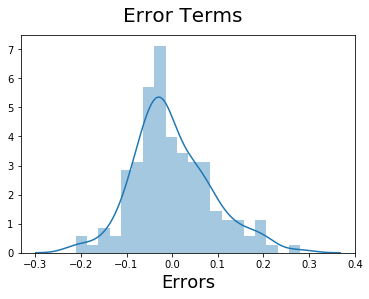

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions

In [65]:
#Making Predictions

num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

CarPrice_test[num_vars] = scaler.transform(CarPrice_test[num_vars])

C:\Users\Abhijeet Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abhijeet Kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Dividing into X_test and y_test

In [66]:
#Dividing into X_test and y_test

y_test = CarPrice_test.pop('price')
X_test = CarPrice_test

In [67]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [68]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0,0.5,'y_pred')

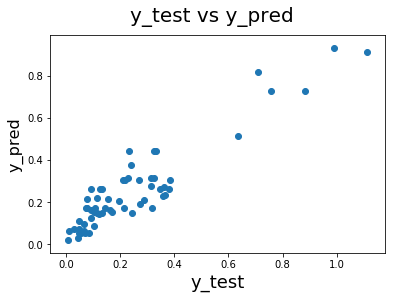

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00764334598079883
r_square_value : 0.8569953526647386


Text(0,0.5,'Views')

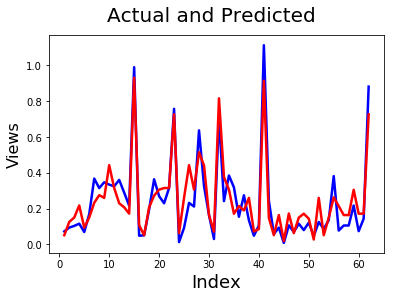

In [71]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label